In [1]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [3]:
#############################
#read in the civillians_shot.csv
civ_shot = pd.read_csv("tji_civiliansShot.csv") 
civ_shot_date = civ_shot['date_incident']
civ_file_date = civ_shot['date_ag_received']

civ_shot_notnan = civ_shot[civ_shot['date_incident'].notna()]
civ_shot_notnan = civ_shot[civ_shot['date_ag_received'].notna()]

#now to reindex the civ_notnan stuff:
civ_shot_notnan = civ_shot_notnan.reset_index(drop=True)

#############################
#read in the officrs_shot.csv
off_shot = pd.read_csv("tji_officersShot.csv") 
off_shot_date = off_shot['date_incident']
off_file_date = off_shot['date_ag_received']

off_shot_notnan = off_shot[off_shot['date_incident'].notna()]
off_shot_notnan = off_shot[off_shot['date_ag_received'].notna()]

#now to reindex the notnan stuff:
off_shot_notnan = off_shot_notnan.reset_index(drop=True)

#############################
#read in custodial_deaths.csv
cust_death = pd.read_csv("tji_civiliansShot.csv")
cust_death_date = cust_death['date_incident']
cust_file_date = cust_death['date_incident']

cust_death_notnan = cust_death[cust_death['date_incident'].notna()]
cust_death_notnan = cust_death[cust_death['date_ag_received'].notna()]

#now to reindex the notnan stuff:
cust_death_notnan = cust_death_notnan.reset_index(drop=True)

# Dates between incident and report for civillians shot 

## Total number of civillian shot reports:

In [4]:
print(len(civ_shot))

772


## Total number of civillian shot reports with incident date + Attorney General recieved date:

In [5]:
print(len(civ_shot_notnan))

541


In [6]:
##################################################
#TOTAL NUMBER OF CIVILLIAN SHOT DATA vs. FULL DATA
print(len(civ_shot))
print(len(civ_shot_notnan))

772
541


In [7]:
civ_date_count = []
for n in range(len(civ_shot_notnan)):
    this_civ_shot_date = civ_shot_notnan['date_incident'][n]
    this_civ_file_date = civ_shot_notnan['date_ag_received'][n]
    days = days_between(this_civ_file_date, this_civ_shot_date)
    civ_date_count.append(days)
    
civ_shot_notnan.insert(2, "date_count", civ_date_count, True)     

print(civ_shot_notnan)

    date_ag_received date_incident  date_count              incident_address  \
0         2017-02-07    2015-11-17         448           1655 BLUE BELL ROAD   
1         2017-02-08    2016-03-05         340                   655 S. 23RD   
2         2017-02-23    2016-04-16         313                           NaN   
3         2017-02-23    2016-07-07         231                  801 MAIN ST.   
4         2017-02-09    2016-07-15         209            6155 W. UNIVERSITY   
..               ...           ...         ...                           ...   
536       2020-01-29    2020-01-06          23                2309 FANNIN ST   
537       2020-01-29    2020-01-09          20  8106 MARTIN LUTHER KING BLVD   
538       2020-01-17    2020-01-14           3            2100 BLOCK TRENTON   
539       2020-01-30    2020-01-22           8                   2009 E PINE   
540       2020-01-30    2020-01-22           8                   2009 E PINE   

    incident_city incident_county  inci

In [8]:
civ_city_list = list(civ_shot_notnan['incident_city'].unique())
city_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_date_mean = np.mean(this_city_data['date_count'])
    city_count_list.append({'City': this_city, 'Mean': this_city_date_mean})

civ_county_df = pd.DataFrame(city_count_list)

In [9]:
civ_city_list = list(civ_shot_notnan['incident_city'].unique())
mean_civ_count_list = []
over_civ_count_list = []
for n in range(len(civ_city_list)-1):
    this_city = civ_city_list[n]
    this_city_data = civ_shot_notnan.loc[civ_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_civ_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_civ_count_df = pd.DataFrame(mean_civ_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_civ_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_civ_count_df = pd.DataFrame(over_civ_count_list)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
civ_county_df_asc = mean_civ_count_df.sort_values(by='Mean', ascending=False)
civ_county_df_asc = civ_county_df_asc.reset_index(drop=True)
print(civ_county_df_asc)

           City   Mean
0         TYLER  738.0
1      ROSHARON  365.0
2     CAMP WOOD  364.0
3      VICTORIA  313.0
4     HIGHLANDS  178.0
..          ...    ...
180  CEDAR HILL    0.0
181   FAIRFIELD    0.0
182     KILGORE    0.0
183      SANDIA    0.0
184         NaN    NaN

[185 rows x 2 columns]


## Mean days between incident and filing report for civillians shot

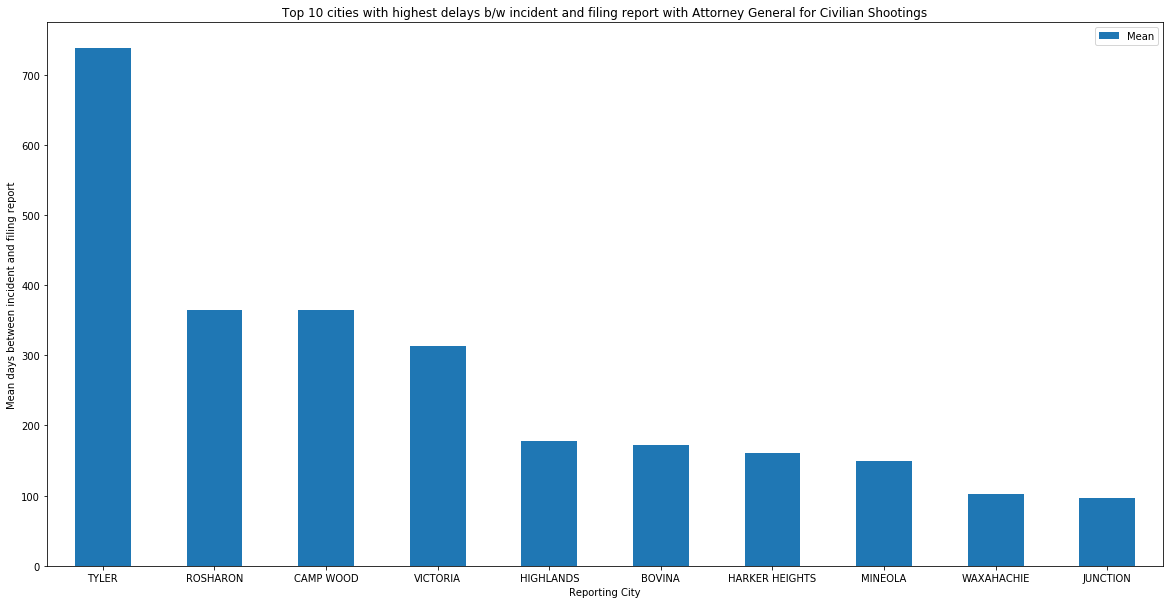

In [28]:
civ_county_df_asc_1 = civ_county_df_asc[0:10]
ax = civ_county_df_asc_1.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 cities with highest delays b/w incident and filing report with Attorney General for Civilian Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')
plt.rcParams["figure.figsize"] = (20,10)

In [12]:
pd.set_option('display.max_rows', 200)
over_civ_count_df

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,9.0,74,0.121622
1,BEAUMONT,1.0,4,0.250000
2,VICTORIA,1.0,1,1.000000
3,DALLAS,1.0,25,0.040000
4,ODESSA,3.0,9,0.333333
5,HIGHLANDS,1.0,1,1.000000
6,HARKER HEIGHTS,1.0,1,1.000000
7,SPRING,2.0,5,0.400000
8,MINEOLA,1.0,1,1.000000
9,SAN ANTONIO,9.0,53,0.169811


In [13]:
#take the over_civ_count_df and sort it ascendingly 
#take the over_off_count_df and sort it ascendingly 
over_civ_count_df_asc = over_civ_count_df.sort_values(by='Total_Over30', ascending=False)
over_civ_count_df_asc = over_civ_count_df_asc.reset_index(drop=True)
over_civ_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,9.0,74,0.121622
1,SAN ANTONIO,9.0,53,0.169811
2,LAREDO,5.0,10,0.500000
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,SPRING,2.0,5,0.400000
6,SCHERTZ,2.0,2,1.000000
7,ARLINGTON,2.0,11,0.181818
8,AUSTIN,2.0,24,0.083333
9,GALVESTON,1.0,4,0.250000


In [14]:
over_civ_count_df_asc_10 = over_civ_count_df_asc[0:10]
over_civ_count_df_asc_10

,City,Total_Over30,Total,Prop_Over30
0,HOUSTON,9.0,74,0.121622
1,SAN ANTONIO,9.0,53,0.169811
2,LAREDO,5.0,10,0.500000
3,ODESSA,3.0,9,0.333333
4,FORT WORTH,3.0,22,0.136364
5,SPRING,2.0,5,0.400000
6,SCHERTZ,2.0,2,1.000000
7,ARLINGTON,2.0,11,0.181818
8,AUSTIN,2.0,24,0.083333
9,GALVESTON,1.0,4,0.250000


## Total number of reports made vs. number of reports after 30-days for civillians shot

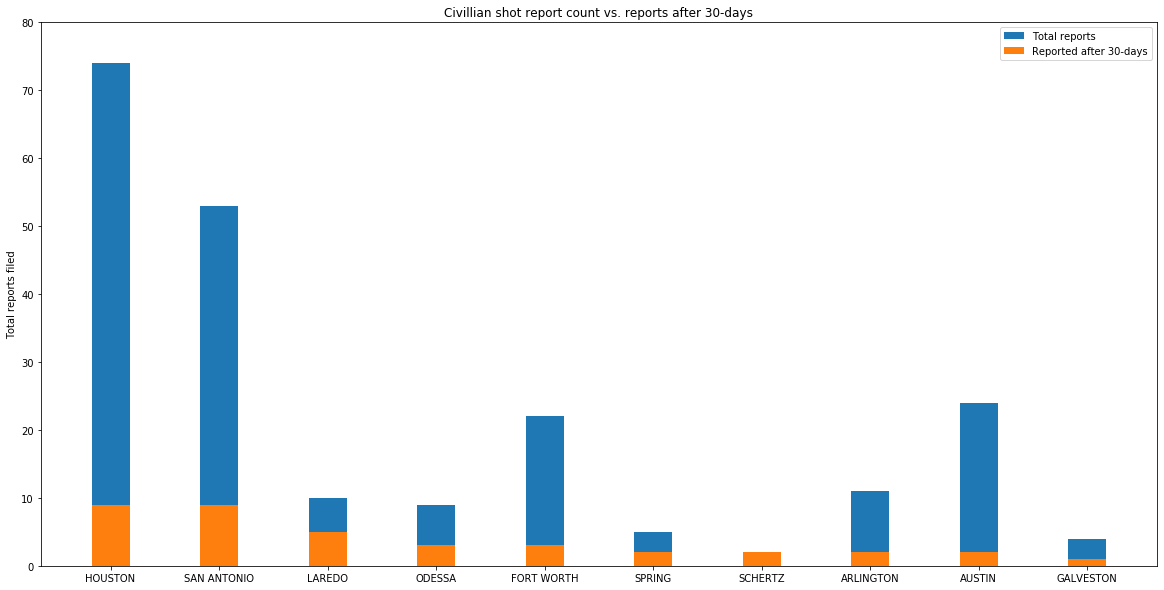

In [15]:
N = len(over_civ_count_df_asc_10)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_civ_count_df_asc_10['Total'], width)
p2 = plt.bar(ind, over_civ_count_df_asc_10['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Civillian shot report count vs. reports after 30-days')
plt.xticks(ind, (over_civ_count_df_asc_10['City']))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()

# Dates between incident and report for officers shot 

In [16]:
def off_days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

## Total number of officer shot reports:

In [17]:
print(len(off_shot))

133


## Total number of civillian shot reports with incident date + Attorney General recieved date:

In [18]:
print(len(off_shot_notnan))

116


In [19]:
##################################################
#TOTAL NUMBER OF CIVILLIAN SHOT DATA vs. FULL DATA
print(len(off_shot))
print(len(off_shot_notnan))

133
116


In [20]:
off_date_count = []
for n in range(len(off_shot_notnan)):
    this_off_shot_date = off_shot_notnan['date_incident'][n]
    this_off_file_date = off_shot_notnan['date_ag_received'][n]
    days = off_days_between(this_off_file_date, this_off_shot_date)
    off_date_count.append(days)
    
off_shot_notnan.insert(2, "date_count", off_date_count, True)     

print(off_shot_notnan)

        date_ag_received        date_incident  date_count  \
0    2017-02-21 00:00:00  2015-11-01 00:00:00         478   
1    2017-02-14 00:00:00  2016-03-01 00:00:00         350   
2    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
3    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
4    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
5    2016-07-20 00:00:00  2016-07-07 00:00:00          13   
6    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
7    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
8    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
9    2017-01-19 00:00:00  2016-07-07 00:00:00         196   
10   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
11   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
12   2017-01-25 00:00:00  2016-07-07 00:00:00         202   
13   2017-02-01 00:00:00  2016-07-07 00:00:00         209   
14   2017-02-01 00:00:00  2016-07-07 00:00:00         209   
15   2016-09-09 00:00:00

In [21]:
off_city_list = list(off_shot_notnan['incident_city'].unique())
mean_count_list = []
over_count_list = []
for n in range(len(off_city_list)-1):
    this_city = off_city_list[n]
    this_city_data = off_shot_notnan.loc[off_shot_notnan['incident_city'] == this_city]
    this_city_total = len(this_city_data) #total incidents
    
    this_city_date_mean = np.mean(this_city_data['date_count'])
    mean_count_list.append({'City': this_city, 'Mean': this_city_date_mean})
    mean_count_df = pd.DataFrame(mean_count_list)
    
    tally_over_30 = []
    for t in range(this_city_total):
        this_city_count = this_city_data.iloc[t-1].date_count
        
        if this_city_count > 30:
            tally_over_30.append(1)
        else:
            tally_over_30.append(0) 
    
    total_over_30 = np.sum(tally_over_30)
    prop_over_30 = np.mean(tally_over_30)
    over_count_list.append({'City': this_city, 'Total_Over30': total_over_30, 'Total': this_city_total, 'Prop_Over30': prop_over_30})    
    over_off_count_df = pd.DataFrame(over_count_list)

In [22]:
mean_count_df_asc = mean_count_df.sort_values(by='Mean', ascending=False)
mean_count_df_asc = mean_count_df_asc.reset_index(drop=True)
mean_count_df_asc

,City,Mean
0,TEMPLE,478.000000
1,EULESS,350.000000
2,MIDLAND,314.000000
3,DALLAS,104.166667
4,SAN ANTONIO,89.454545
5,SANTA FE,54.000000
6,FORT WORTH,50.333333
7,SUGAR LAND,48.000000
8,LAREDO,44.300000
9,EL PASO,36.000000


## Mean days between incident and filing report for officers shot

Text(0, 0.5, 'Mean days between incident and filing report')

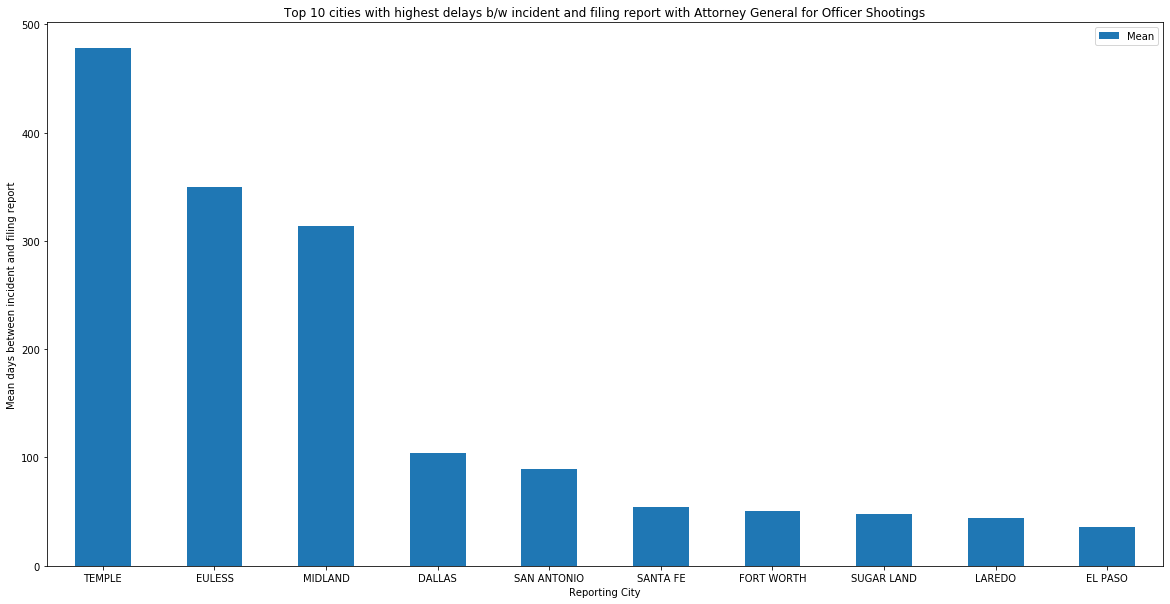

In [23]:
mean_count_df_asc = mean_count_df_asc[0:10]
ax = mean_count_df_asc.plot.bar(x='City', y='Mean', rot=0)
ax.set_title('Top 10 cities with highest delays b/w incident and filing report with Attorney General for Officer Shootings')
ax.set_xlabel('Reporting City')
ax.set_ylabel('Mean days between incident and filing report')


In [24]:
over_off_count_df

,City,Total_Over30,Total,Prop_Over30
0,TEMPLE,1,1,1.000000
1,EULESS,1,1,1.000000
2,DALLAS,9,18,0.500000
3,KATY,0,2,0.000000
4,FORT WORTH,2,3,0.666667
5,CLEBURNE,0,1,0.000000
6,HOUSTON,1,20,0.050000
7,SAN ANTONIO,3,11,0.272727
8,FRONTON,0,1,0.000000
9,LAREDO,8,10,0.800000


In [25]:
#take the over_off_count_df and sort it ascendingly 
over_off_count_df_asc = over_off_count_df.sort_values(by='Total_Over30', ascending=False)
over_off_count_df_asc = over_off_count_df_asc.reset_index(drop=True)
over_off_count_df_asc

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,EL PASO,1,2,0.500000
6,SANTA FE,1,1,1.000000
7,LEAGUE CITY,1,3,0.333333
8,EULESS,1,1,1.000000
9,ARLINGTON,1,3,0.333333


In [26]:
over_off_count_df_asc_10 = over_off_count_df_asc[0:10]
over_off_count_df_asc_10

,City,Total_Over30,Total,Prop_Over30
0,DALLAS,9,18,0.500000
1,LAREDO,8,10,0.800000
2,SAN ANTONIO,3,11,0.272727
3,FORT WORTH,2,3,0.666667
4,TEMPLE,1,1,1.000000
5,EL PASO,1,2,0.500000
6,SANTA FE,1,1,1.000000
7,LEAGUE CITY,1,3,0.333333
8,EULESS,1,1,1.000000
9,ARLINGTON,1,3,0.333333


## Total number of reports made vs. number of reports after 30-days for officers shot

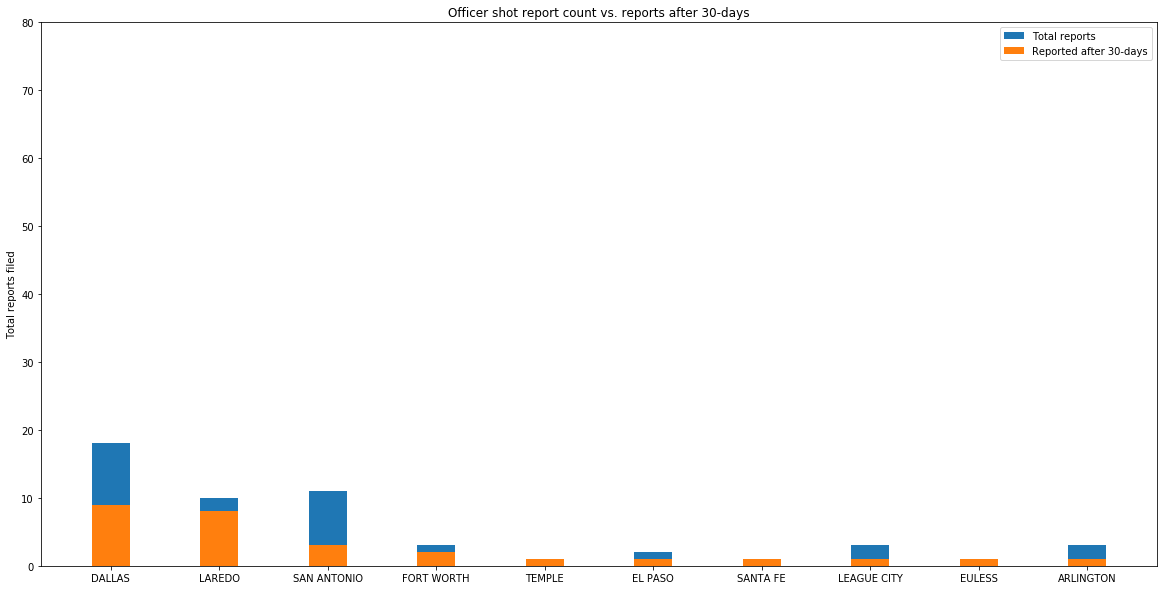

In [27]:
N = len(over_off_count_df_asc_10)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, over_off_count_df_asc_10['Total'], width)
p2 = plt.bar(ind, over_off_count_df_asc_10['Total_Over30'], width, bottom=0)

plt.ylabel('Total reports filed')
plt.title('Officer shot report count vs. reports after 30-days')
plt.xticks(ind, (over_off_count_df_asc_10['City']))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Total reports', 'Reported after 30-days'))

plt.show()